# Train YOLO models with custom dataset
Preliminary CV model for LiLiE deck.

A total of 613 images have been labelled [layer, empty space] and split into train, validation, and test sets. The split was performed manually in order to avoid having similar images in the differet sets.

#Workflow
1. Annotate images over [Roboflow](https://roboflow.com/)
2. Download dataset: over roboflow, choose prefered yolo format -> show download code -> paste the code in **Download labelled dataset** block
3. In Training block, replace the data.yaml file with your actual filepath in data=/content/your_project/data.yaml
4. run all blocks




# Install Ultralytics
Select GPU in **Runtime -> Change runtime type -> Hardware accelerator** for faster training

In [1]:
!pip install ultralytics

import torch
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 914.9/914.9 kB 24.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 73.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 63.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 48.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 54.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

# Download labelled dataset
Due to the cloud file system of Colab, your dataset file won't be stored when you disconnect each time. You can download dataset using the code provided from [Roboflow](https://app.roboflow.com) (recommand).


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="yo2HtqPl2d1VgLTtHs9H")
project = rf.workspace("llecvtesting").project("lle_cv")
version = project.version(2)
dataset = version.download("yolov8")

# Training
These are the arguments you could edit
*   **batch**: 8 or 16 to start with, any number of the power of 2 would work.
*   **epochs**: 10 or 20 to start with, increase if your dataset is small, or the results is not as expected.
*   **data**: In the downloaded dateset from Roboflow, there should be a data.yaml file, replace the **vial-detection-finn-1/data.yaml** in the line below with **your-dataset/data.yaml**.
*   **weight**: choose from (yolov5n.pt, yolov5s.pt, yolov5m.pt, yolov5l.pt, yolov5x.pt), see the yolov5 pages for more explanation

In [ ]:
# Load a COCO-pretrained YOLOv8n model and train it on the LLE CV dataset for 100 epochs
!yolo train model=yolov8m.pt data=/content/LLE_CV-2/data.yaml epochs=100 imgsz=640 batch=16

the following defaults are applied if not explicitly specified:

- epochs: 100 — Number of training epochs.
- batch: 16 — Batch size.
- imgsz: 640 — Image size (640x640).
- device: "cpu" or the first available GPU (0) if detected.
- optimizer: SGD — Stochastic Gradient Descent (SGD) optimizer. You can also specify Adam or AdamW.
- lr0: 0.01 — Initial learning rate.
- momentum: 0.937 — Momentum used in SGD.
- weight_decay: 0.0005 — Weight decay regularization.
- project: "runs/train" — Directory to save results.
- name: "exp" — Name of the experiment; creates a sub-folder under project.
- save_period: 10 — Interval (in epochs) for saving model checkpoints.

In [ ]:
# Run batched inference on a list of images
from ultralytics import YOLO

lle_model= YOLO("/content/runs/detect/train/weights/best.pt")
lle_model.export(format="onnx")

In [ ]:
# Run batched inference on a list of images
from ultralytics import YOLO

lle_model= YOLO("/content/runs/detect/train/weights/best.pt")
results = lle_model("/content/LLE_CV-2/test/images", stream =True)  # return a list of Results objects

# Process results list
for result in results:
    boxes = result.boxes  # Boxes object for bounding box outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    keypoints = result.keypoints  # Keypoints object for pose outputs
    probs = result.probs  # Probs object for classification outputs
    obb = result.obb  # Oriented boxes object for OBB outputs
    result.show()  # display to screen
    # result.save(filename="result.jpg")  # save to disk

Output hidden; open in https://colab.research.google.com to view.

*italicized text*# Visuallize
Training results are saved in **runs/detect/train** folder, check the newest exp folder, there should be an autocreated prediction image.
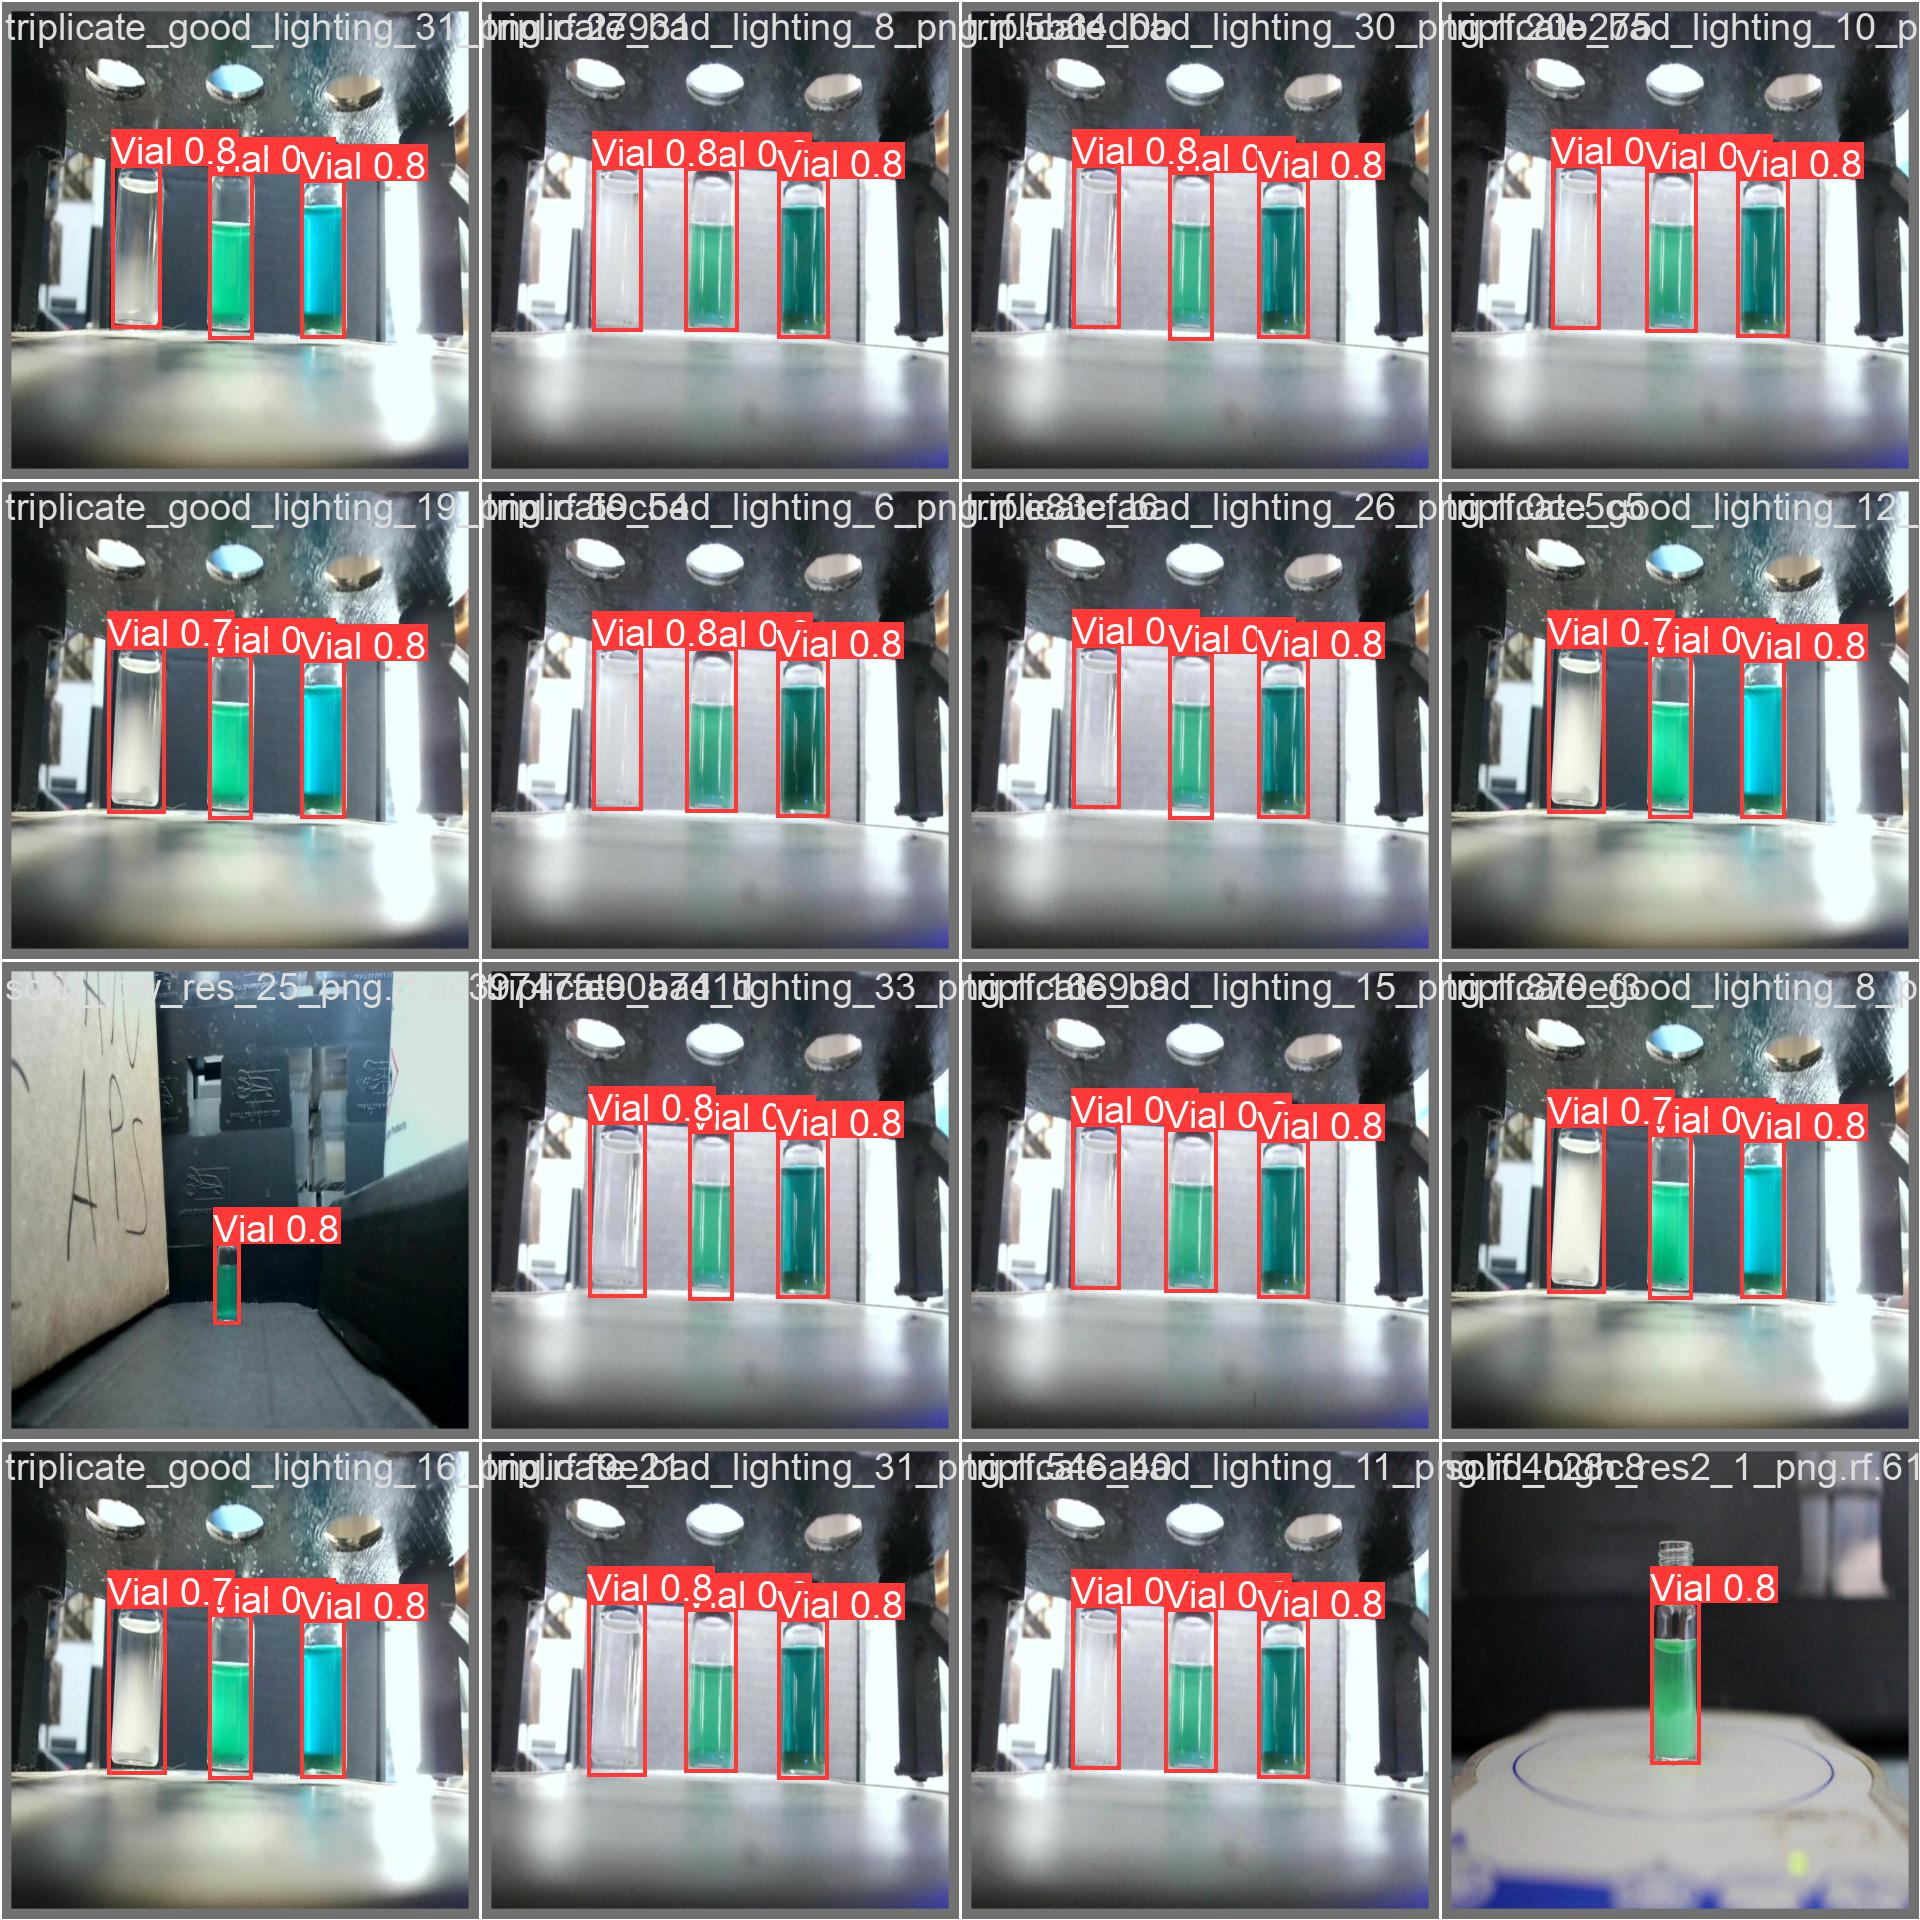